<a href="https://colab.research.google.com/github/youngmook/cheminfo-python/blob/main/cheminfo_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Miniconda 설치
Miniconda version : py37_4.12.0<br/>
Base OS : Ubuntu 18.04 (2022.05.18 기준) 테스트

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local

--2022-05-18 00:57:41--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh [following]
--2022-05-18 00:57:41--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M  56.9MB/s    in 1.8s    

2022-05-18 00:57:43 (56.9 MB/s) - ‘

## RDKit (Cheminformatics tool) 설치

In [2]:
!time conda install -q -y -c conda-forge rdkit==2019.03.4=py37hb31dc5d_1


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit==2019.03.4=py37hb31dc5d_1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.70.0               |   py37h9de70de_1         337 KB  conda-forge
    boost-cpp-1.70.0           |       h7b93d67_3        21.1 MB  conda-forge
    bottleneck-1.3.2           |   py37h902c9e0_3         129 KB  conda-forge
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    cairo-1.16.0               |    h9f066cc_1006         1.5 MB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_2         145 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0

## RDKit 불러오기


In [45]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

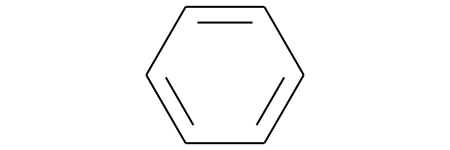

In [13]:
theBenzeneMol = Chem.MolFromSmiles('c1ccccc1')
theBenzeneMol

##MDL Molfile 문자열 만들기

In [16]:
theBenzeneMolBlock = Chem.MolToMolBlock(theBenzeneMol)
print(theBenzeneMolBlock)


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



##분자 이름 변경하기

In [19]:
theBenzeneMol.SetProp('_Name','Benzene')
print(Chem.MolToMolBlock(theBenzeneMol))

Benzene
     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



##분자를 Mol파일로 저장하기


In [26]:
print(Chem.MolToMolBlock(theBenzeneMol),file=open('benzene.mol', 'w+'))

MDL Mol 파일 불러오기

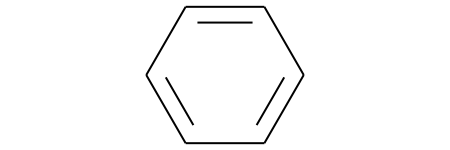

In [27]:
theNewBenzeneMol = Chem.MolFromMolFile('benzene.mol')
theNewBenzeneMol

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄

In [33]:
theInvalidMolecule1 = Chem.MolFromSmiles('CO(C)C')
theInvalidMolecule1 is None

RDKit ERROR: [02:49:51] Explicit valence for atom # 1 O, 3, is greater than permitted


True

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄 (Kekulize 오류)

In [34]:
theInvalidMolecule1 = Chem.MolFromSmiles('c1cc1')
theInvalidMolecule1 is None

RDKit ERROR: [02:50:03] Can't kekulize mol.  Unkekulized atoms: 0 1 2
RDKit ERROR: 


True

분자의 원자 개수 확인

In [39]:
theNumOfAtoms = theBenzeneMol.GetNumAtoms()
theNumOfAtoms

6

분자의 Bond 개수 확인

In [38]:
theNumOfBonds = theBenzeneMol.GetNumBonds()
theNumOfBonds

6

분자에 H원자 붙이기

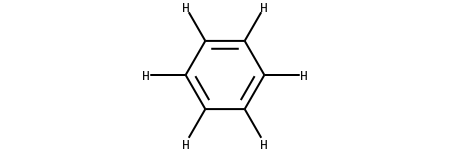

In [40]:
theBenzeneMolWithHAtoms = Chem.AddHs(theBenzeneMol)
theBenzeneMolWithHAtoms

분자구조의 위치를 3차원 좌표값으로 만들기

Benzene
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.7943   -1.1490    0.0150 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3607    0.1298   -0.0022 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5898    1.2681   -0.0170 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7866    1.1450   -0.0149 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3413   -0.1124    0.0019 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5806   -1.2656    0.0170 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4026   -2.0428    0.0267 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4183    0.2113   -0.0036 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0075    2.2686   -0.0304 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4182    2.0293   -0.0265 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4222   -0.2172    0.0037 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0241   -2.2652    0.0304 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1 

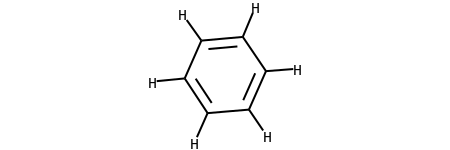

In [49]:
AllChem.EmbedMolecule(theBenzeneMolWithHAtoms)  
print(Chem.MolToMolBlock(theBenzeneMolWithHAtoms))
theBenzeneMolWithHAtoms

Benzene
     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1 

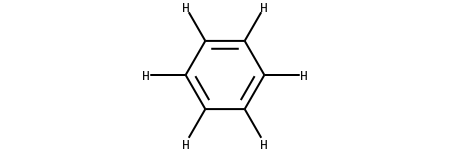

In [50]:
AllChem.Compute2DCoords(theBenzeneMolWithHAtoms)
print(Chem.MolToMolBlock(theBenzeneMolWithHAtoms))
theBenzeneMolWithHAtoms

H원자 지우기

Benzene
     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



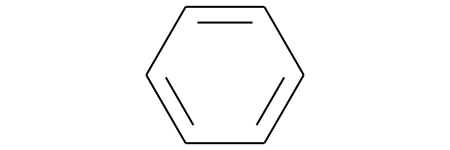

In [51]:
theBenzeneMol2 = Chem.RemoveHs(theBenzeneMolWithHAtoms)
print(Chem.MolToMolBlock(theBenzeneMol2))
theBenzeneMol2